# This is my first .ipynb program for liniear regression and gradient descent
To start this program, first I load tha library and arrange the data that will be fit into single-variable regression equation.

In [44]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

x_i = np.array([3.18, 6.6, 4.7, 2.9, 4.9, 7.9, 8.9, 4, 5.76, 9.16, 8.32, 4.19, 7.01, 1.59, 7.75, 6.84, 5.32])
y_i = np.array([14.17, 29.16, 19.9, 12.05, 18.12, 35.99, 41.62, 15.1, 28.27, 36.98, 33.51, 14.02, 30.29, 8.89, 31.68, 31.1, 24.32])



To make it clear, lets plot the data.

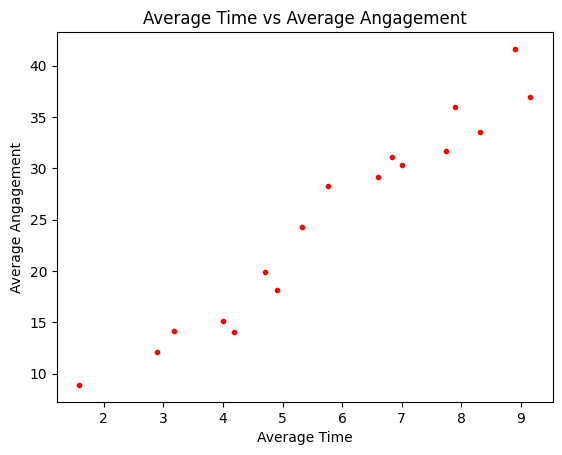

In [45]:
plt.plot(x_i, y_i, 'r.')
plt.title("Average Time vs Average Angagement")
plt.xlabel("Average Time")
plt.ylabel("Average Angagement")
plt.show()

## Cost Function
Cost function, $J(w,b)$, simply calculate the squared error of the model we build with the actual data. It is utilize the input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [48]:
def cost_function(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

## The gradient of cost function over w and b variable
After defining the cost function, we should define the gradient from it over w and b, to find the minimize the error from our models.
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

In [49]:
def cost_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

## Gradient Descent Algorithm

In [51]:
import math
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, cost_gradient): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using cost_gradient
        dj_dw, dj_db = cost_gradient(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [52]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_i ,y_i, w_init, b_init, tmp_alpha, 
                                                    iterations, cost_function, cost_gradient)
print("(w,b) found by gradient descent: ({},{})".format(w_final, b_final))

Iteration    0: Cost 1.33e+02  dj_dw: -1.661e+02, dj_db: -2.501e+01   w:  1.661e+00, b: 2.50100e-01
Iteration 1000: Cost 2.37e+00  dj_dw: -5.219e-03, dj_db:  3.450e-02   w:  4.304e+00, b:-2.68772e-02
Iteration 2000: Cost 2.36e+00  dj_dw: -1.591e-03, dj_db:  1.052e-02   w:  4.335e+00, b:-2.28623e-01
Iteration 3000: Cost 2.36e+00  dj_dw: -4.850e-04, dj_db:  3.206e-03   w:  4.344e+00, b:-2.90123e-01
Iteration 4000: Cost 2.36e+00  dj_dw: -1.479e-04, dj_db:  9.772e-04   w:  4.347e+00, b:-3.08871e-01
Iteration 5000: Cost 2.36e+00  dj_dw: -4.507e-05, dj_db:  2.979e-04   w:  4.348e+00, b:-3.14586e-01
Iteration 6000: Cost 2.36e+00  dj_dw: -1.374e-05, dj_db:  9.081e-05   w:  4.348e+00, b:-3.16328e-01
Iteration 7000: Cost 2.36e+00  dj_dw: -4.188e-06, dj_db:  2.768e-05   w:  4.348e+00, b:-3.16859e-01
Iteration 8000: Cost 2.36e+00  dj_dw: -1.277e-06, dj_db:  8.439e-06   w:  4.348e+00, b:-3.17021e-01
Iteration 9000: Cost 2.36e+00  dj_dw: -3.892e-07, dj_db:  2.573e-06   w:  4.348e+00, b:-3.17071e-01


Plot the value of cost function over iterations.

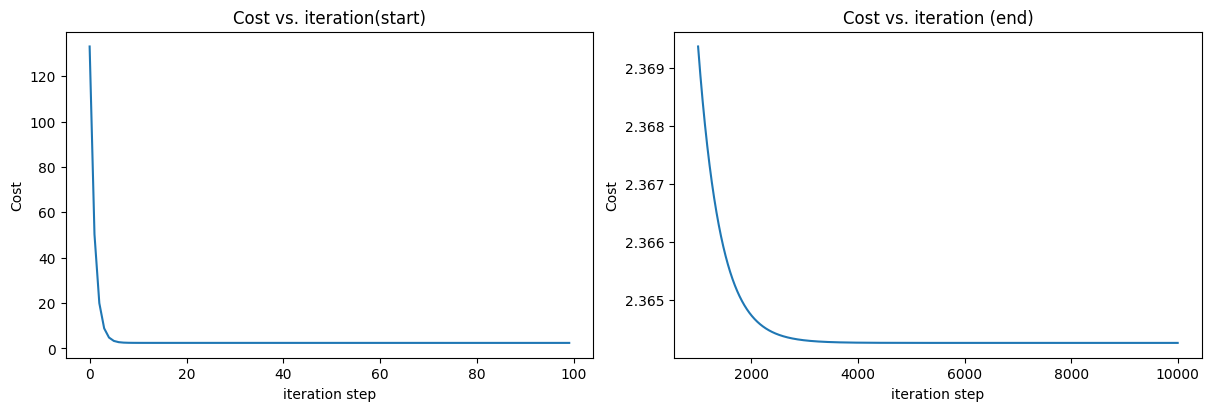

In [53]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

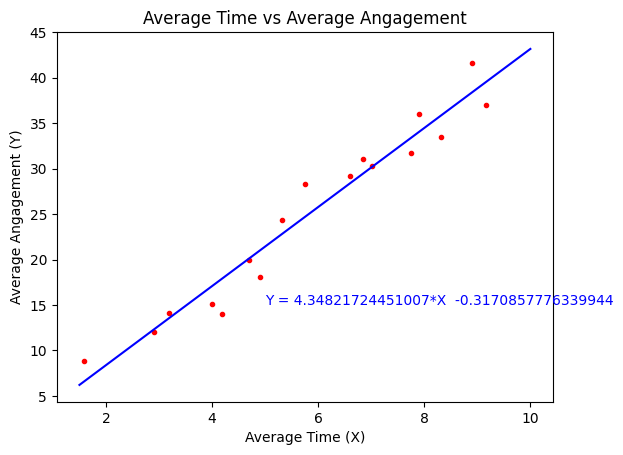

In [81]:
x_pred = np.array([1.5, 10])
y_pred = w_final * x_pred + b_final
plt.plot(x_i, y_i, 'r.')
plt.plot(x_pred, y_pred, 'b-')
plt.title("Average Time vs Average Angagement")
plt.xlabel("Average Time (X)")
plt.ylabel("Average Angagement (Y)")
plt.text(5, 15, 'Y = {}*X  {}'.format(w_final, b_final), color='b')
plt.show()

## Regression using sklearn
In this regression process, first we will focuses on using the LinearRegression function. Before that, we have to reshape the data, from 1 dimension (that we used it for manual regression and gradient descent) to become 2 dimension.

In [75]:
x = x_i.reshape(x_i.shape[0],1)
y = y_i.reshape(y_i.shape[0],1)

Import LinearRegression module from sklearn.linear_model. After running the program, the result actually very similar with the result that we have from manual gradient descent.

In [76]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.coef_, lin_reg.intercept_

(array([[4.34821824]]), array([-0.31709238]))

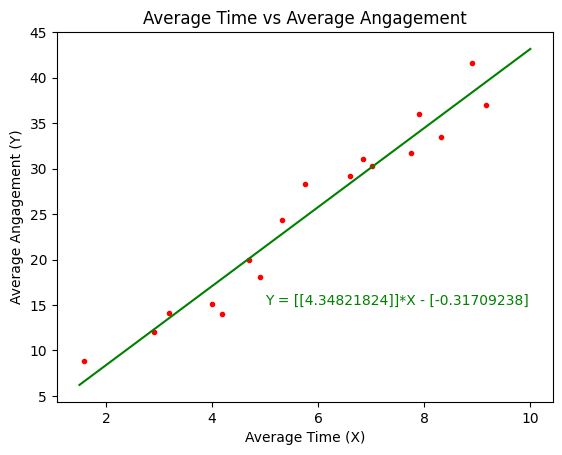

In [79]:
x_pred = np.array([[1.5],[10]])
y_pred = lin_reg.predict(x_pred)
plt.plot(x, y, 'r.')
plt.plot(x_pred, y_pred, 'g-')
plt.title("Average Time vs Average Angagement")
plt.xlabel("Average Time (X)")
plt.ylabel("Average Angagement (Y)")
plt.text(5, 15, "Y = {}*X - {}".format(lin_reg.coef_, lin_reg.intercept_), color='g')
plt.show()

Instead of using LinearRegression module, we also can use SGDRegressor. But if we use this with default argument, we may ends with not accurate result. See the [SGDRegressor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html).

In [83]:
from sklearn.linear_model import SGDRegressor

# Create a new Stochastic Gradient Descent regressor.
sgd_reg = SGDRegressor(
    loss='squared_error', 
    penalty='l2', alpha=0.0001, 
    l1_ratio=0.15, 
    fit_intercept=True, 
    max_iter=1000, tol=0.001, shuffle=True, 
    verbose=0, epsilon=0.1, random_state=None, 
    learning_rate='invscaling', eta0=0.01, power_t=0.25, 
    early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, warm_start=False, average=False
)

# Fit the model.
sgd_reg.fit(x, y.ravel())

# Display the slope and intercept.
sgd_reg.coef_, sgd_reg.intercept_

(array([4.22824618]), array([0.48991036]))